In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Load data
df = pd.read_csv('train.csv')
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
15559,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,TIwOs7iFTKo3Cy2yiNReYYcZc1JyAx+0k08+z97k1dA=,my library,Local playlist more,local-playlist,1.0
15560,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,q5/Vwifgv0SGdEIyiMU2F0pIXkeCIW3w2xB8n4iMoS0=,my library,Local playlist more,local-playlist,0.0
15561,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,B2jGIdcFp/C/jeFaJdOwrw72q0kEetFFo+fReLkd6o0=,my library,Local playlist more,local-playlist,1.0
15562,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,Tk7vkd8yZqpi6MGiK391iqbpTFVcDizMM8p4NQhw0C8=,my library,Local playlist more,local-playlist,1.0


In [9]:
# Sampling Only Half the Data
df = df.sample(frac=0.5)

In [10]:
# Load and join songs data
songs = pd.read_csv('songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join members data
members = pd.read_csv('members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7782 entries, 0 to 7781
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    7782 non-null   object 
 1   song_id                 7782 non-null   object 
 2   source_system_tab       7757 non-null   object 
 3   source_screen_name      7544 non-null   object 
 4   source_type             7761 non-null   object 
 5   target                  7782 non-null   float64
 6   song_length             931 non-null    float64
 7   genre_ids               917 non-null    object 
 8   artist_name             931 non-null    object 
 9   composer                750 non-null    object 
 10  lyricist                585 non-null    object 
 11  language                931 non-null    float64
 12  city                    7782 non-null   int64  
 13  bd                      7782 non-null   int64  
 14  gender                  4724 non-null   

In [12]:
df.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,7782.000000,931.000000,931.000000,7782.000000,7782.000000,7782.000000,7.782000e+03,7.782000e+03
mean,0.768311,243058.557465,16.881847,7.787715,17.593292,6.810974,2.012566e+07,2.017185e+07
std,0.421938,46090.617913,20.197759,6.476707,15.409210,2.278709,2.870175e+04,3.691849e+03
min,0.000000,86099.000000,-1.000000,1.000000,0.000000,3.000000,2.004033e+07,2.016023e+07
25%,1.000000,213182.000000,3.000000,1.000000,0.000000,4.000000,2.011061e+07,2.017091e+07
50%,1.000000,237087.000000,3.000000,5.000000,22.000000,7.000000,2.013060e+07,2.017093e+07
75%,1.000000,266971.000000,31.000000,13.000000,29.000000,9.000000,2.015062e+07,2.017101e+07
max,1.000000,491728.000000,59.000000,22.000000,111.000000,13.000000,2.016120e+07,2.019041e+07


In [13]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique().sort_values(ascending=True)

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,261,7197,0.924827
composer,object,362,7032,0.903624
genre_ids,object,41,6865,0.882164
song_length,float64,533,6851,0.880365
artist_name,object,367,6851,0.880365
language,float64,8,6851,0.880365
gender,object,2,3058,0.392958
source_screen_name,object,16,238,0.030583
source_system_tab,object,7,25,0.003213
source_type,object,10,21,0.002699


**Visualizing Nul Values**

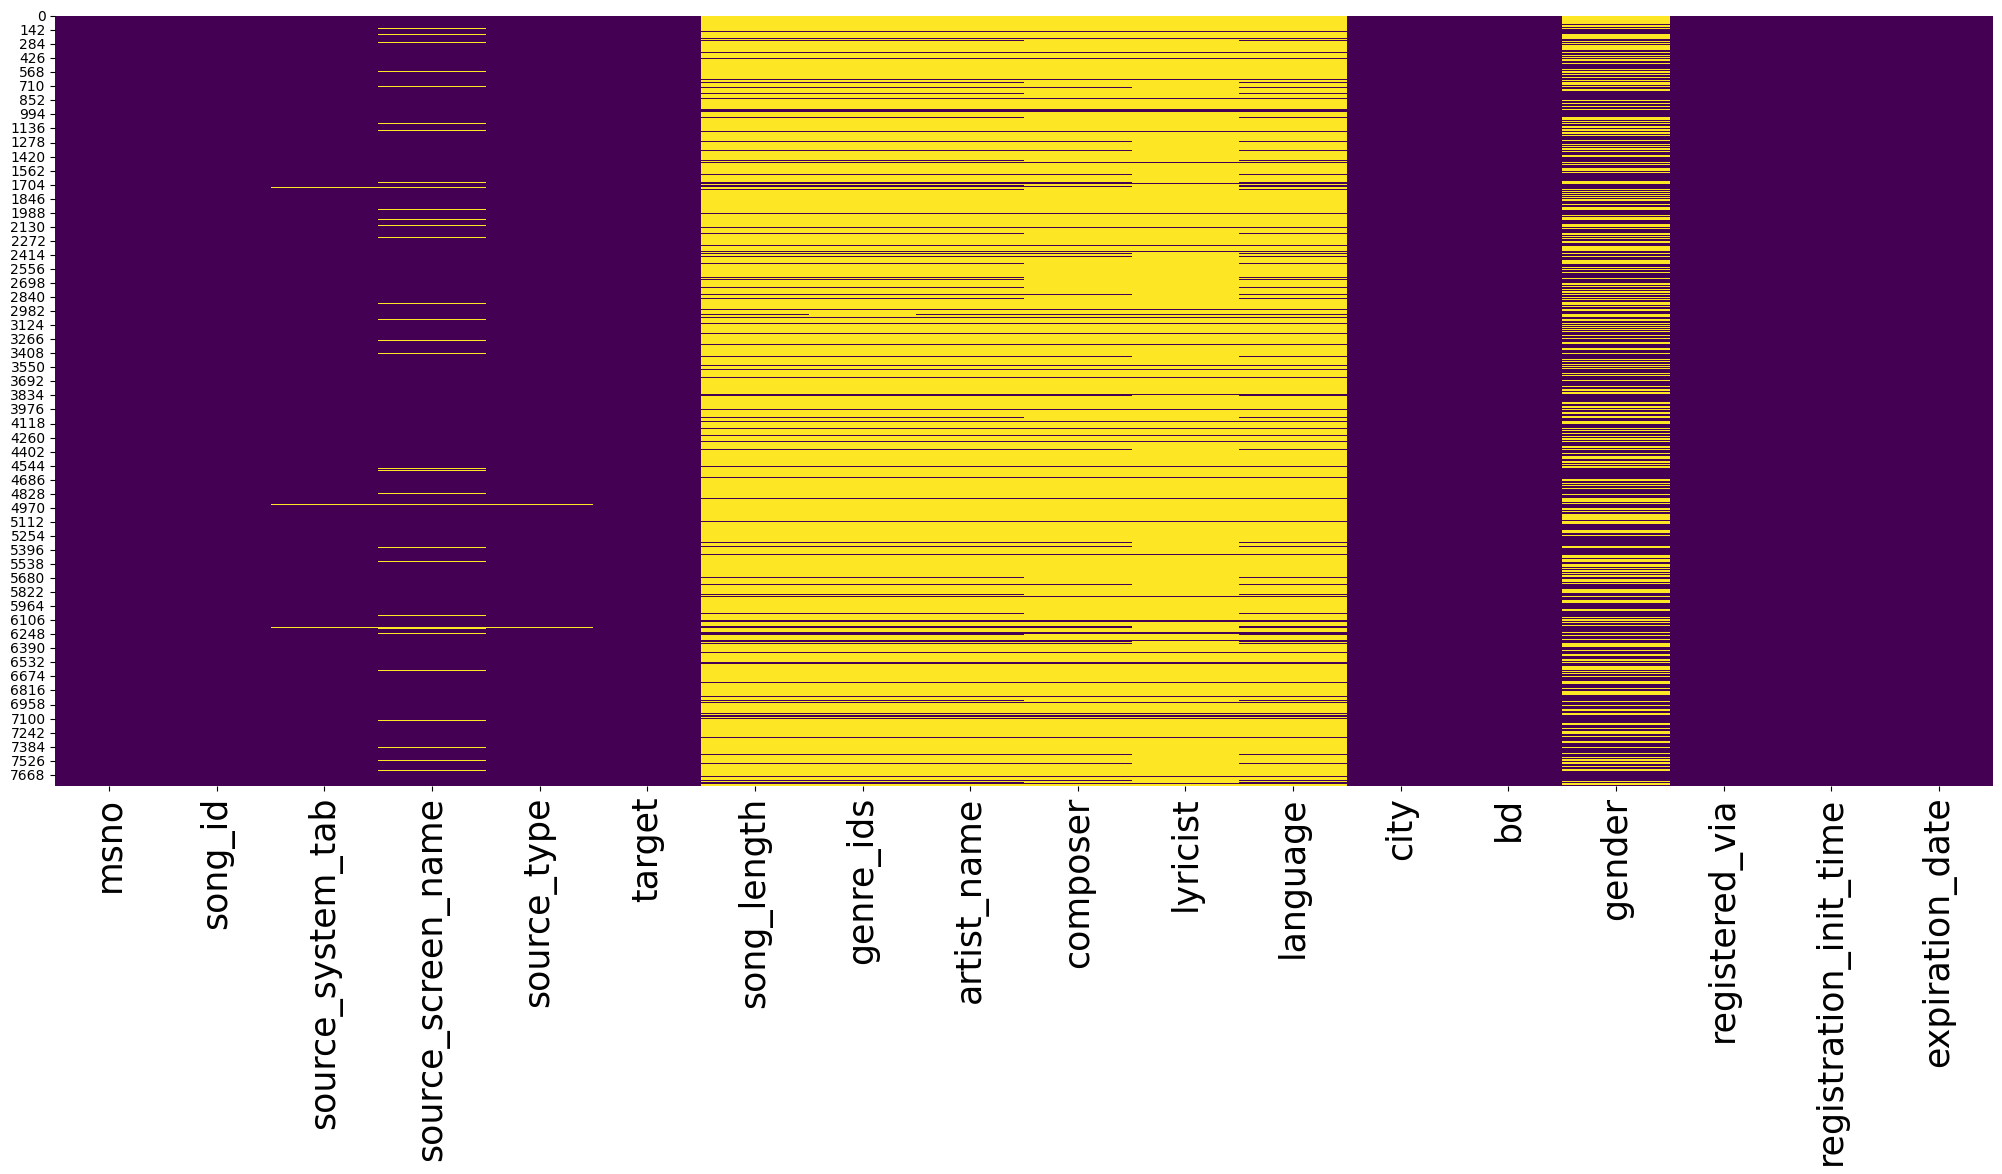

In [14]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.tick_params(axis='x', labelsize=25)


**Filling Null Values**

In [15]:
# Strings with 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
# Numerics with mean
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

In [16]:
df.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

**Parsing Dates and Extracting new Date Features**

In [17]:
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


df['expiration_date'] = pd.to_datetime(df['expiration_date'],  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [18]:
# Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [19]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,7H8Teyq/bk0vHVwbjT2+Otaz8vHTgdJHmfxwYm2P/K8=,qqSwRkEEupyglXAJQfkXOQR9feE0CcI3IEmY4MB/QQE=,my library,Local playlist more,local-playlist,1.0,243058.557465,unknown,unknown,unknown,...,unknown,4,2016-06-17,2017-10-01,2016,6,17,2017,10,1
1,kG0RBksvdpBYM7Kus0Atpkg/bb/uTP1uwBJuAODy1XA=,jZVQRajq2WbbIoSiF5MSCyJKgTt7tpITHayD3PYKg88=,discover,Discover Chart,online-playlist,1.0,243058.557465,unknown,unknown,unknown,...,female,9,2014-01-30,2018-06-21,2014,1,30,2018,6,21
2,0NG//zvnjTKN6b9t8odPNiMGErrFWkVIpp0SfsLKy2k=,ML4JT5C349ybpJrR9xuj9vkknukFHhaQaLpGAF8VMnw=,my library,Local playlist more,local-library,0.0,243058.557465,unknown,unknown,unknown,...,male,3,2014-09-25,2017-03-02,2014,9,25,2017,3,2
3,aSKxKEtU7h9h79Bb1ZSuIgbSL+IJlsznRhfiMmX0ZdQ=,fCCmIa0Y5m+MCGbQga31MOLTIqi7ddgXvkjFPmfslGw=,discover,Unknown,online-playlist,1.0,243058.557465,unknown,unknown,unknown,...,female,9,2007-07-28,2017-10-22,2007,7,28,2017,10,22
4,BCRaRkps5gerQgoqWyEm7p92Yd7MW6VKm19Rq9G/IEk=,+9cKsPJH9rOF2YYq76vT5uUYZ1GVIaaArYXnd0M1vPk=,search,Album more,album,1.0,243058.557465,unknown,unknown,unknown,...,unknown,7,2010-12-27,2017-09-30,2010,12,27,2017,9,30


**Encoding and Categorizating Columns**

In [20]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7782 entries, 0 to 7781
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   msno                          7782 non-null   int16  
 1   song_id                       7782 non-null   int16  
 2   source_system_tab             7782 non-null   int8   
 3   source_screen_name            7782 non-null   int8   
 4   source_type                   7782 non-null   int8   
 5   target                        7782 non-null   float64
 6   song_length                   7782 non-null   float64
 7   genre_ids                     7782 non-null   int8   
 8   artist_name                   7782 non-null   int16  
 9   composer                      7782 non-null   int16  
 10  lyricist                      7782 non-null   int16  
 11  language                      7782 non-null   float64
 12  city                          7782 non-null   int64  
 13  bd 

In [22]:
df.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
count,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,...,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000
mean,960.354665,2338.635312,2.598047,7.435235,3.894115,0.768311,243058.557465,38.250835,182.239399,218.423799,...,1.070804,6.810974,720.588795,196.774480,2012.494731,6.939733,15.882935,2017.100488,8.330249,15.539322
std,543.928187,1349.811568,1.405128,2.740427,1.568991,0.421938,15934.421358,7.836824,34.448166,32.394914,...,0.842728,2.278709,382.858065,71.766329,2.872282,3.570048,8.664804,0.383341,2.501182,9.120095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86099.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,2004.000000,1.000000,1.000000,2016.000000,1.000000,1.000000
25%,484.000000,1178.250000,3.000000,7.000000,3.000000,1.000000,243058.557465,41.000000,181.000000,220.000000,...,0.000000,4.000000,415.000000,178.000000,2011.000000,4.000000,8.000000,2017.000000,9.000000,8.000000
50%,975.000000,2303.000000,3.000000,7.000000,3.000000,1.000000,243058.557465,41.000000,181.000000,220.000000,...,1.000000,7.000000,713.000000,193.000000,2013.000000,8.000000,16.000000,2017.000000,9.000000,15.000000
75%,1428.000000,3488.750000,3.000000,7.000000,4.000000,1.000000,243058.557465,41.000000,181.000000,220.000000,...,2.000000,9.000000,1062.000000,204.000000,2015.000000,10.000000,24.000000,2017.000000,10.000000,23.000000
max,1925.000000,4710.000000,7.000000,16.000000,10.000000,1.000000,491728.000000,41.000000,367.000000,362.000000,...,2.000000,13.000000,1357.000000,412.000000,2016.000000,12.000000,31.000000,2019.000000,12.000000,31.000000


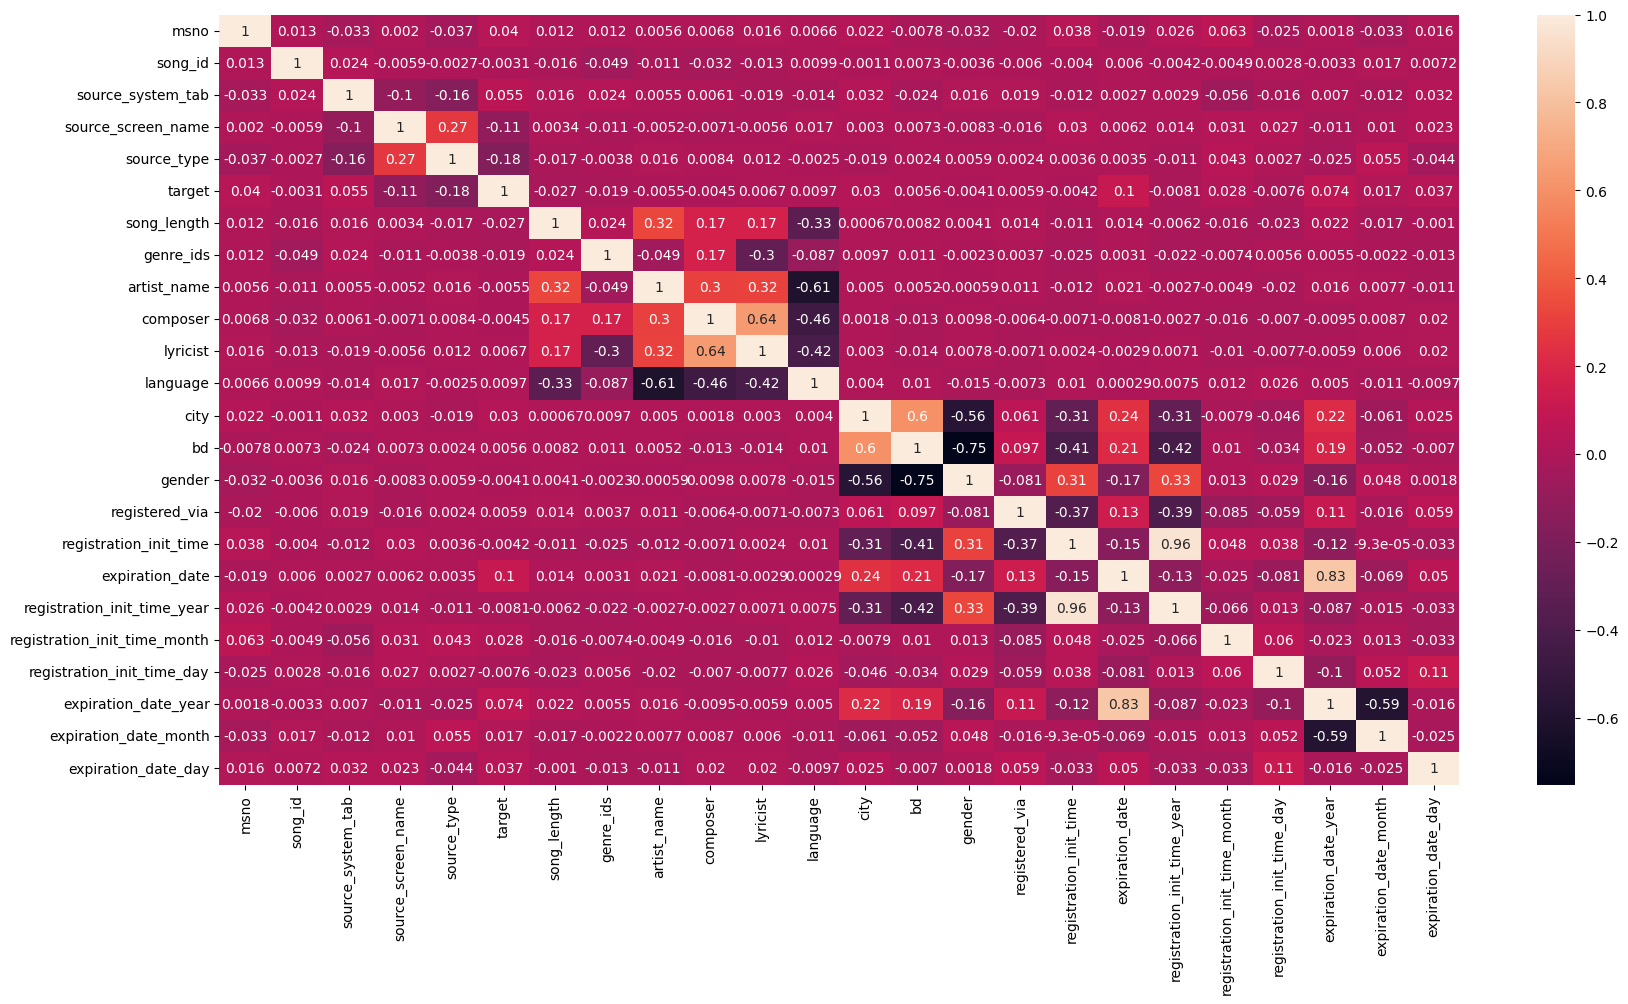

In [23]:
# Сorrelation matrix
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

**Train and Test split**

In [24]:
target = df.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split( df , target, test_size = 0.2)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(6225, 23)
(6225,)
(1557, 23)
(1557,)


**Feature Selection with Random Forest**

In [25]:
# Model with the best estimator
RF = RandomForestClassifier()
RF.fit(train_data, train_labels)

RF_TrainScore = RF.score(train_data, train_labels)
RF_TrainScore

1.0

In [26]:
RF_TestScore = RF.score(test_data, test_labels)
RF_TestScore

0.8298008991650611

In [27]:
y_pred_rf =RF.predict(test_data)

<Axes: >

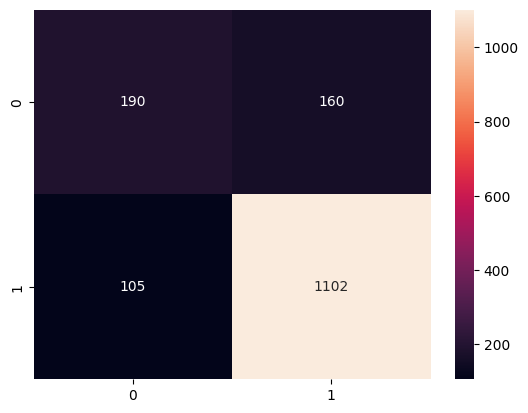

In [28]:
#Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(test_labels, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g')

In [29]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.64      0.54      0.59       350
         1.0       0.87      0.91      0.89      1207

    accuracy                           0.83      1557
   macro avg       0.76      0.73      0.74      1557
weighted avg       0.82      0.83      0.82      1557



**Feature Selection**

In [30]:
df_plot = pd.DataFrame({'features': df.columns,
                        'importances': RF.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

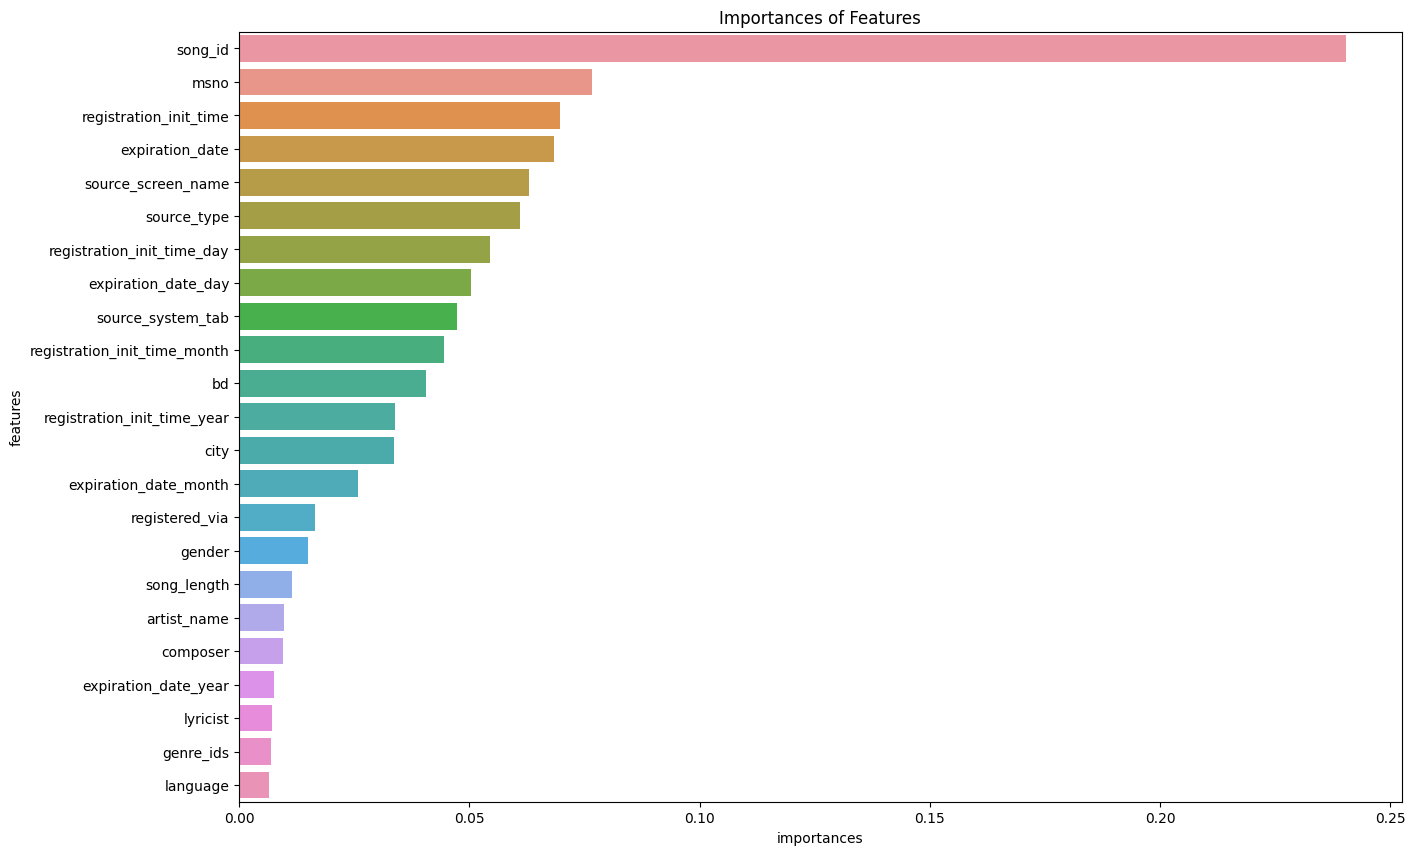

In [31]:
plt.figure(figsize=[15,10])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features')
plt.show()

In [32]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

<ipython-input-32-e0603b15f65c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)


In [33]:
# Selected columns
print(df.shape)
df.columns

(7782, 11)


Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'bd', 'registration_init_time', 'expiration_date',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_day'],
      dtype='object')

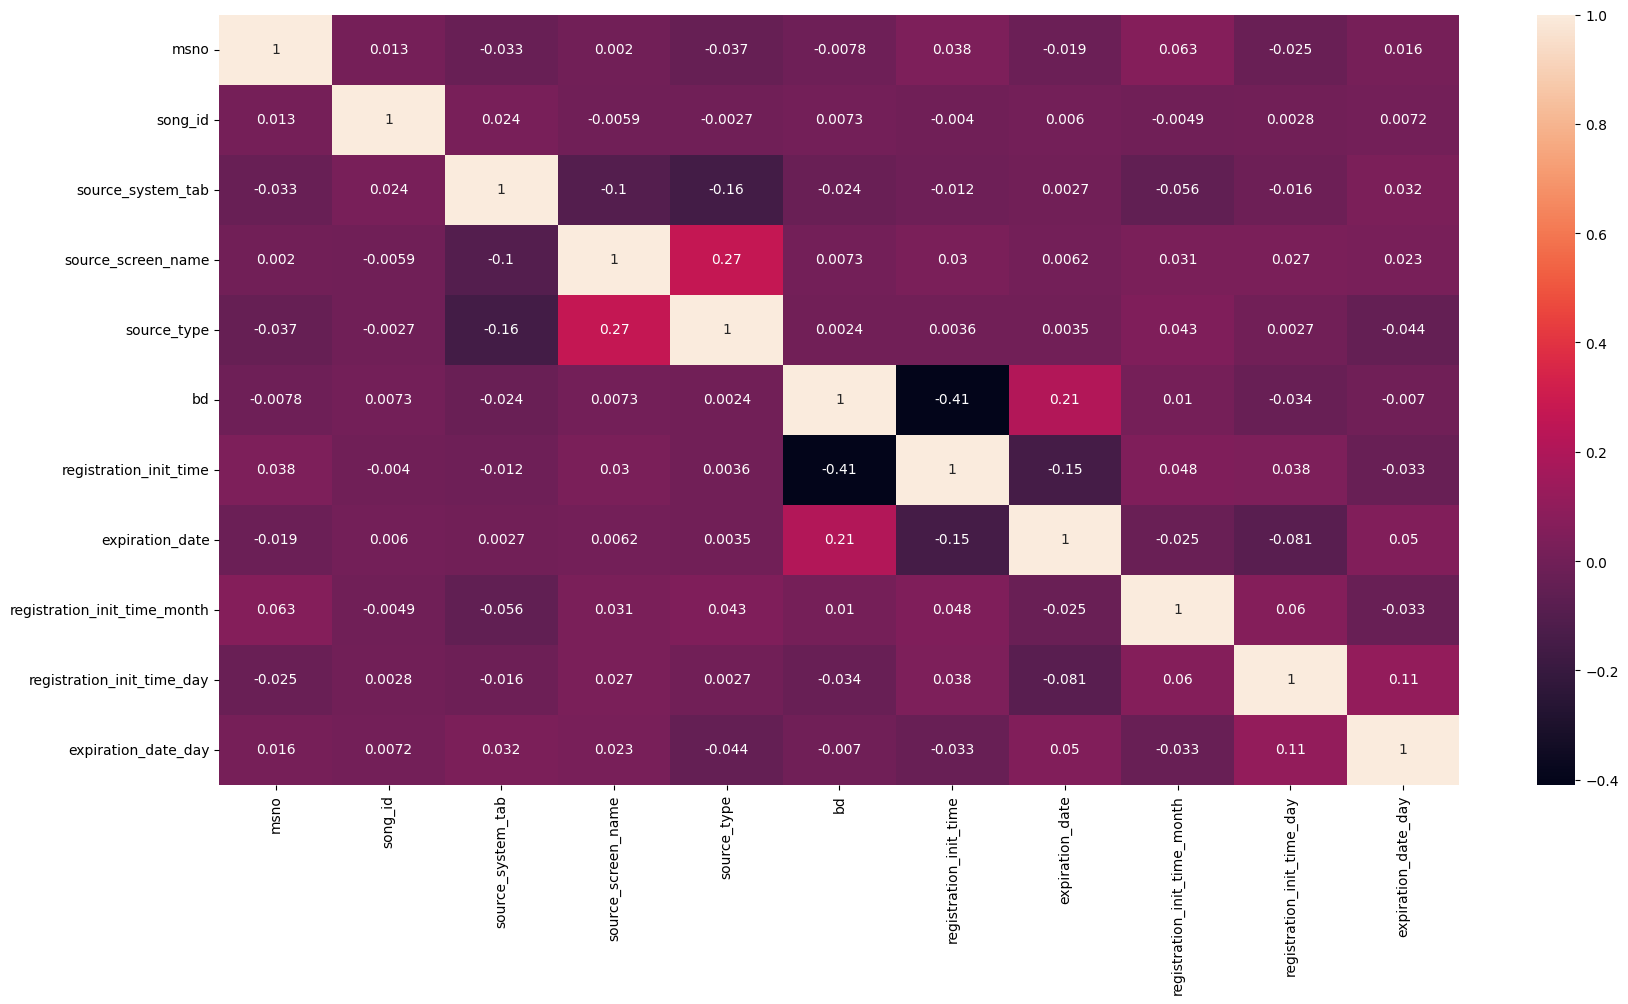

In [34]:
# Сorrelation matrix
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

**XGBoosting**

In [35]:
import xgboost as xgb

In [36]:
# Create model
XGB = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5)
XGB.fit(train_data, train_labels)

XGB_TrainScore = XGB.score(train_data, train_labels)
XGB_TrainScore

0.9429718875502008

In [37]:
XGB_TestScore = XGB.score(test_data, test_labels)

XGB_TestScore

0.8420038535645472

In [38]:
y_pred_xgb =XGB.predict(test_data)

<Axes: >

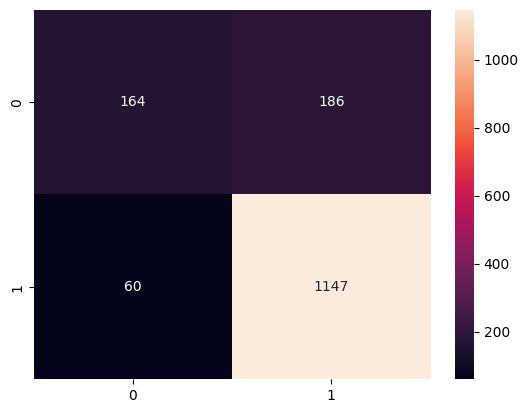

In [39]:
cm_lgbm = confusion_matrix(test_labels, y_pred_xgb)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [40]:
print(classification_report(test_labels, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.73      0.47      0.57       350
         1.0       0.86      0.95      0.90      1207

    accuracy                           0.84      1557
   macro avg       0.80      0.71      0.74      1557
weighted avg       0.83      0.84      0.83      1557



**Light LGBM**

In [41]:
import lightgbm as lgb

d_train = lgb.Dataset(train_data, label=train_labels)

In [42]:
params = {
        'objective': 'binary',
        'boosting': 'dart',
        'learning_rate': 0.2 ,
        'verbose': 0,
        'num_leaves': 100,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'num_rounds': 100,
        'metric' : 'auc'
    }

In [43]:
clf = lgb.train(params, d_train, 100)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [44]:
y_predtrain_lgbm=clf.predict(train_data)

y_predtest_lgbm=clf.predict(test_data)

In [45]:
# Making Prediction for training and test sets
for i in range(0, train_data.shape[0]):
    if y_predtrain_lgbm[i]>=.5:
        y_predtrain_lgbm[i]=1
    else:
        y_predtrain_lgbm[i]=0

for i in range(0, test_data.shape[0]):
    if y_predtest_lgbm[i]>=.5:
        y_predtest_lgbm[i]=1
    else:
        y_predtest_lgbm[i]=0

In [46]:
from sklearn.metrics import accuracy_score


LGBM_TrainScore = accuracy_score(y_predtrain_lgbm,train_labels)
LGBM_TestScore = accuracy_score(y_predtest_lgbm,test_labels)
#Print accuracy
print ("Test Accuracy with LGBM = ", LGBM_TrainScore)
print ("Test Accuracy with LGBM = ", LGBM_TestScore)

Test Accuracy with LGBM =  0.9746184738955823
Test Accuracy with LGBM =  0.8471419396274887


<Axes: >

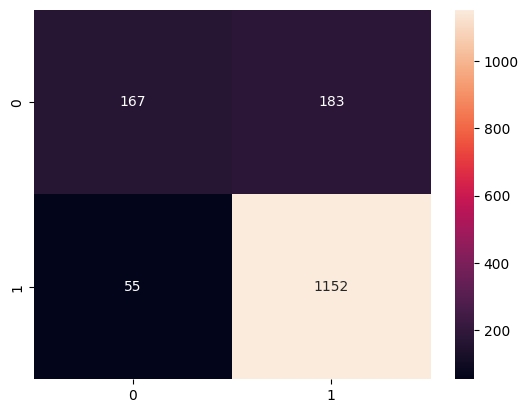

In [47]:
#Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_lgbm = confusion_matrix(test_labels, y_predtest_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [48]:
print(classification_report(test_labels, y_predtest_lgbm))

              precision    recall  f1-score   support

         0.0       0.75      0.48      0.58       350
         1.0       0.86      0.95      0.91      1207

    accuracy                           0.85      1557
   macro avg       0.81      0.72      0.75      1557
weighted avg       0.84      0.85      0.83      1557



**CatBoost Classifier**

In [51]:
from catboost import CatBoostClassifier

In [52]:
CatBoost = CatBoostClassifier(learning_rate=0.1, depth=10, iterations=300)
CatBoost.fit(train_data, train_labels)


CatBoost_TrainScore = CatBoost.score(train_data, train_labels)

0:	learn: 0.6449274	total: 67.8ms	remaining: 20.3s
1:	learn: 0.6085146	total: 86ms	remaining: 12.8s
2:	learn: 0.5726951	total: 105ms	remaining: 10.3s
3:	learn: 0.5496493	total: 125ms	remaining: 9.21s
4:	learn: 0.5326955	total: 128ms	remaining: 7.54s
5:	learn: 0.5120382	total: 146ms	remaining: 7.15s
6:	learn: 0.4932161	total: 164ms	remaining: 6.88s
7:	learn: 0.4766793	total: 185ms	remaining: 6.76s
8:	learn: 0.4671411	total: 203ms	remaining: 6.57s
9:	learn: 0.4551635	total: 239ms	remaining: 6.93s
10:	learn: 0.4468236	total: 277ms	remaining: 7.29s
11:	learn: 0.4404165	total: 318ms	remaining: 7.64s
12:	learn: 0.4333360	total: 355ms	remaining: 7.84s
13:	learn: 0.4275073	total: 392ms	remaining: 8.02s
14:	learn: 0.4216491	total: 417ms	remaining: 7.92s
15:	learn: 0.4168720	total: 450ms	remaining: 7.99s
16:	learn: 0.4095842	total: 490ms	remaining: 8.15s
17:	learn: 0.4062511	total: 525ms	remaining: 8.22s
18:	learn: 0.4021182	total: 559ms	remaining: 8.27s
19:	learn: 0.3980698	total: 591ms	remaini

In [53]:
CatBoost_TrainScore

0.9810441767068273

In [54]:
CatBoost_TestScore = CatBoost.score(test_data, test_labels)
CatBoost_TestScore

0.8452151573538856

In [55]:
# Predicting
y_pred_catboost = CatBoost.predict(test_data)

<Axes: >

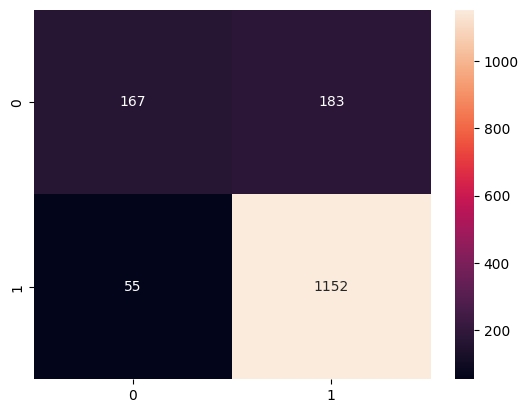

In [56]:
cm_catboost = confusion_matrix(test_labels, y_pred_catboost)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [57]:
print(classification_report(test_labels, y_pred_catboost))

              precision    recall  f1-score   support

         0.0       0.74      0.48      0.58       350
         1.0       0.86      0.95      0.91      1207

    accuracy                           0.85      1557
   macro avg       0.80      0.72      0.74      1557
weighted avg       0.84      0.85      0.83      1557



**Comparing Boostings Resultst**

In [58]:
results = pd.DataFrame( [["Random Forest", RF_TrainScore, RF_TestScore ],
                       ["XGBoost", XGB_TrainScore ,XGB_TestScore ],
                        ["Light LGBM", LGBM_TrainScore ,LGBM_TestScore ],
                        ["CatBoost", CatBoost_TrainScore ,CatBoost_TestScore ]],
                       columns = ["Model","Training Accuracy %","Test Evaluation %"]).sort_values(by="Test Evaluation %",ascending=False)
results.style.background_gradient(cmap='BuPu')

,Model,Training Accuracy %,Test Evaluation %
2,Light LGBM,0.974618,0.847142
3,CatBoost,0.981044,0.845215
1,XGBoost,0.942972,0.842004
0,Random Forest,1.000000,0.829801
